# Matplotlib으로 데이터 시각화하기

**데이터를 보기좋게 표현해봅시다.**

#### 1. Matplotlib 시작하기
   
#### 2. 자주 사용되는 Plotting의 Options
- 크기 : `figsize`
- 제목 : `title`
- 라벨 : `_label`
- 눈금 : `_tics`
- 범례 : `legend`
  
#### 3. Matplotlib Case Study
- 꺾은선 그래프 (Plot)
- 산점도 (Scatter Plot)
- 박스그림 (Box Plot)
- 막대그래프 (Bar Chart)
- 원형그래프 (Pie Chart)
  
#### 4. The 멋진 그래프, seaborn Case Study
- 커널밀도그림 (Kernel Density Plot)
- 카운트그림 (Count Plot)
- 캣그림 (Cat Plot)
- 스트립그림 (Strip Plot)
- 히트맵 (Heatmap)
  

## I. Matplotlib 시작하기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

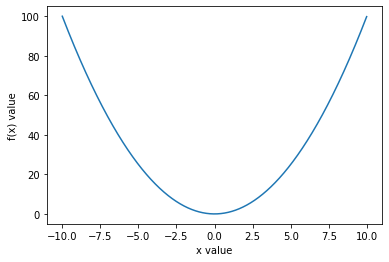

In [3]:
x = np.arange(-10, 10, 0.01)
plt.xlabel("x value")
plt.ylabel("f(x) value")

plt.plot(x, x**2)
plt.show()

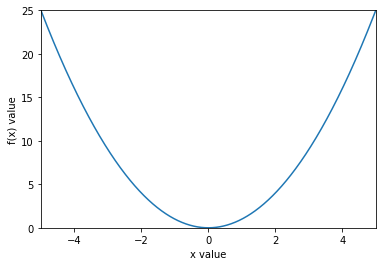

In [4]:
x = np.arange(-10, 10, 0.01)
plt.xlabel("x value")
plt.ylabel("f(x) value")

plt.axis([-5, 5, 0, 25])

plt.plot(x, x**2)
plt.show()

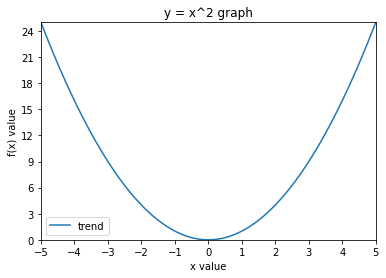

In [5]:
# x, y 축에 눈금 설정하기

x = np.arange(-10, 10, 0.01)
plt.xlabel("x value")
plt.ylabel("f(x) value")
plt.axis([-5, 5, 0, 25])

plt.xticks([i for i in range(-5, 6)])
plt.yticks([i for i in range(0, 25, 3)])

plt.title("y = x^2 graph")

plt.plot(x, x**2, label="trend")
plt.legend()
plt.show()

## II. Matplotlib Case Study

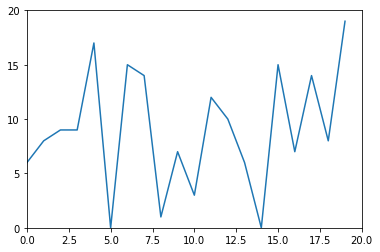

In [6]:
#꺾은선 그래프 (Plot) - 시계열 데이터에 활용

x = np.arange(20)
y = np.random.randint(0,20,20)

plt.plot(x, y)

# Extra: y축을 20까지, 5단위로 표시하기
plt.axis([0,20,0,20])
plt.yticks([0,5,10,15,20])

plt.show()

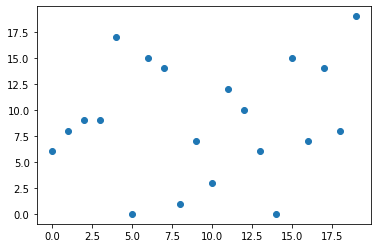

In [7]:
# 산점도 (Scatter plot) - x와 y의 상관관계를 파악하는데에 활용

plt.scatter(x,y)
plt.show()

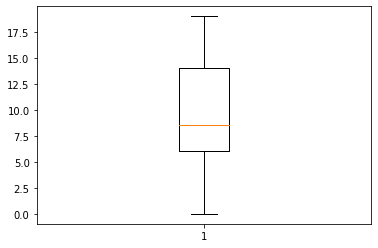

In [8]:
# 박스 그림 (Box Plot) - 수치형 데이터에 대한 정보

plt.boxplot(y)
plt.show()

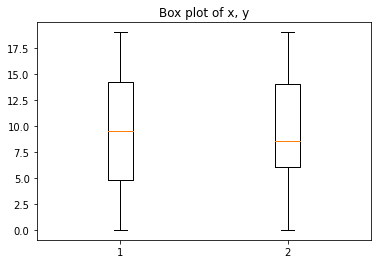

In [9]:
plt.boxplot((x,y))
plt.title("Box plot of x, y")
plt.show()

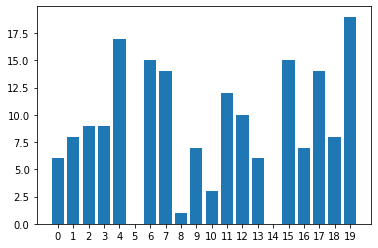

In [10]:
# 막대 그래프 (Bar plot)

plt.bar(x,y)

# Extra: xtics를 올바르게 처리해봅시다.

plt.xticks(np.arange(0,20,1))
plt.show()

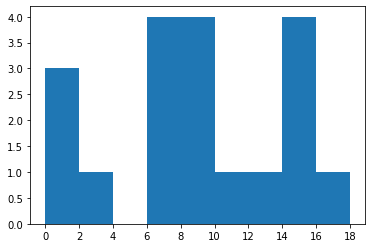

In [11]:
# Histogram - 도수분표를 직사각형의 막대 형태지만, 계급이 존재합니다.
# 0, 1, 2가 아니라 0~2 까지의 "범주형" 데이터로 구성

plt.hist(y, bins=np.arange(0,20,2))
plt.xticks(np.arange(0,20,2))
plt.show()

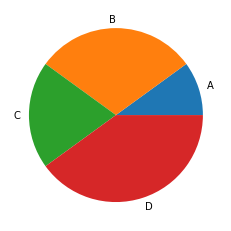

In [12]:
# 원형 그래프 (Pie chart)

z = [100, 300, 200, 400]
plt.pie(z, labels=['A', 'B', 'C', 'D'])
plt.show()

## III. The 멋진 그래프, Seaborn Case Study

In [13]:
import seaborn as sns

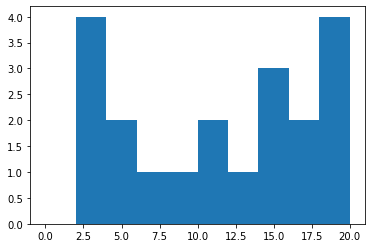

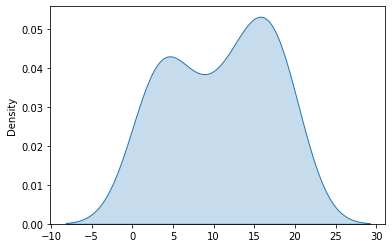

In [14]:
# histogram

x = np.arange(0,22,2)
y = np.random.randint(0,20,20)

plt.hist(y, bins=x)
plt.show()

#kdeplot

sns.kdeplot(y, shade=True)
plt.show()

In [15]:
# 카운트 플롯(Count Plot)

vote_df = pd.DataFrame({"name":['A', 'B', 'C'], "vote":[True, True, False]})

vote_df

,name,vote
0,A,True
1,B,True
2,C,False


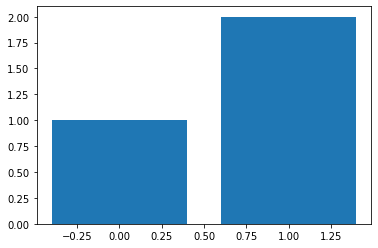

In [16]:
vote_count = vote_df.groupby('vote').count()

vote_count

plt.bar(x=[False, True], height=vote_count['name'])
plt.show()

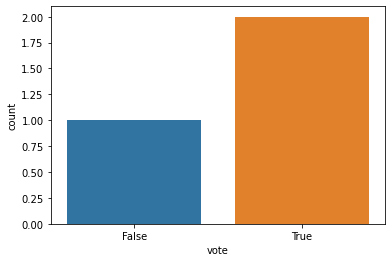

In [17]:
sns.countplot(x = vote_df['vote'])

plt.show()

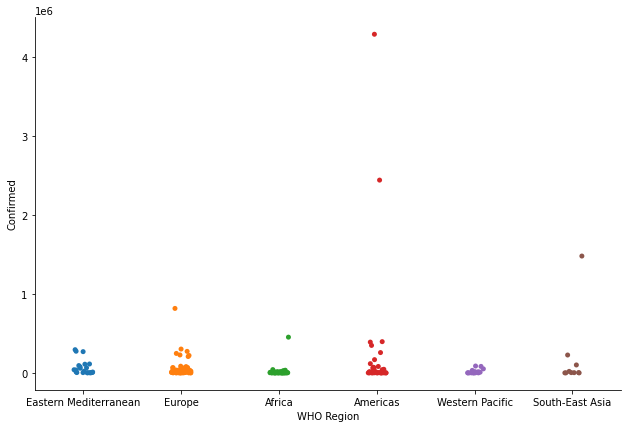

In [20]:
# 캣 플롯 (Cat Plot)

covid = pd.read_csv("./country_wise_latest.csv")

s = sns.catplot(x='WHO Region', y='Confirmed', data=covid)
s.fig.set_size_inches(10,6)
plt.show()

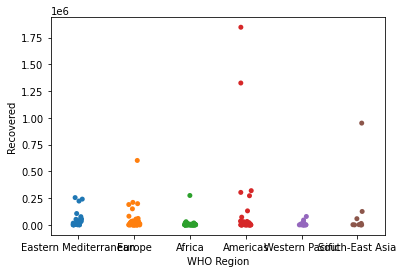

In [21]:
# 스트립 플롯 (Strip plot)

sns.stripplot(x='WHO Region', y='Recovered', data=covid)
plt.show()

/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 69.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 54.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; y

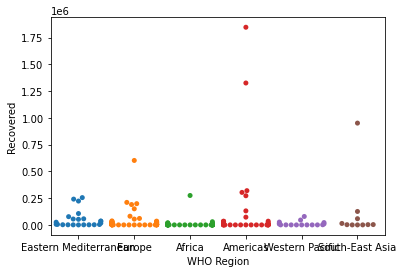

In [22]:
# 스웜 플롯 (Swarm plot)

sns.swarmplot(x='WHO Region', y='Recovered', data=covid)
plt.show()

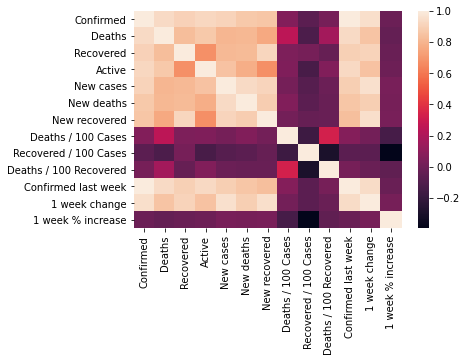

In [24]:
# 히트맵 (Heatmap)

sns.heatmap(covid.corr())
plt.show()

## Mission:

### 